In [1]:
### If Google Colab
!git config --global user.email "sjs.shamsi@gmail.com"
!git config --global user.name "SJShamsi"

from google.colab import drive
drive.mount('/content/drive')

Thesis_Files = '/content/drive/MyDrive/Thesis_Files/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
### Importing common items
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-colorblind')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from fastai.vision.all import *
from fastai.callback.tracker import SaveModelCallback

# Classification with Equivalent bined images

In [3]:
dmdt_by_Name_Band_file = Thesis_Files + 'Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50_equivalent_bins.pkl'

In [4]:
dmdt_by_Name_Band = pd.read_pickle(dmdt_by_Name_Band_file)
dmdt_by_Name_Band

,name,type,band,n_good_det,hist_p_scale,histogram
0,1E 22044+468,A,rg,"[697, 439]","[235815, 96023]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 1.0414171604719703e-05, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0..."
1,2E 1853.7+4452,A,rg,"[591, 158]","[166322, 12399]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 8.065166545689168e-05, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 8.065166545689168e-05, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 8.065166545689168e-05, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0...."
2,2MASS J00265121-0159238,A,rg,"[257, 219]","[32816, 23829]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.00020982836040119184, 0.0], [0.0, 0.0001258970162407151, 0.0], [0.0, 8.393134416047674e-05, 0.0], [0.0, 0.00033572537664190694, 0.0], [3.047294002925402e-05, 0.0002517940324814302, 0.0], [0.00018283764017552415, ..."
3,2MASS J00573811-1406173,A,rg,"[162, 147]","[13019, 10715]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 9.332711152589827e-05, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 9.332711152589827e-05, 0.0], [0.0, 0.0, 0.0..."
4,2MASS J01283395-2358359,A,rg,"[81, 103]","[3233, 5243]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
...,...,...,...,...,...,...
31798,J224028.85-010649.8,Seyfert_1,rg,"[149, 125]","[10995, 7746]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.

In [5]:
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['type'].isin(['Q', 'QR', 'QX'])].reset_index(drop=True)
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['band'] == 'rg']
dmdt_by_Name_Band = dmdt_by_Name_Band.drop(columns=['name', 'band', 'n_good_det', 'hist_p_scale'])

In [6]:
dmdt_by_Name_Band['type'].value_counts()

,count
type,
Q,19544
QX,2425
QR,1277


In [7]:
def numpy_to_pil(numpy_array):
    numpy_array = (numpy_array - numpy_array[:, :, :-1].min()) / (numpy_array[:, :, :-1].max() - numpy_array[:, :, :-1].min())
    numpy_array[:, :, 2] = np.zeros_like(numpy_array[:, :, 2])
    return PILImage.create(Image.fromarray((numpy_array * 255).astype(np.uint8)))

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # Input: images, Output: categories
    get_x=lambda r: numpy_to_pil(r['histogram']),  # Convert NumPy array to image
    get_y=lambda r: r['type'],           # Get the label (type)
    splitter=RandomSplitter(valid_pct=0.2),  # Split into training and validation sets
    item_tfms=Resize(224)
)

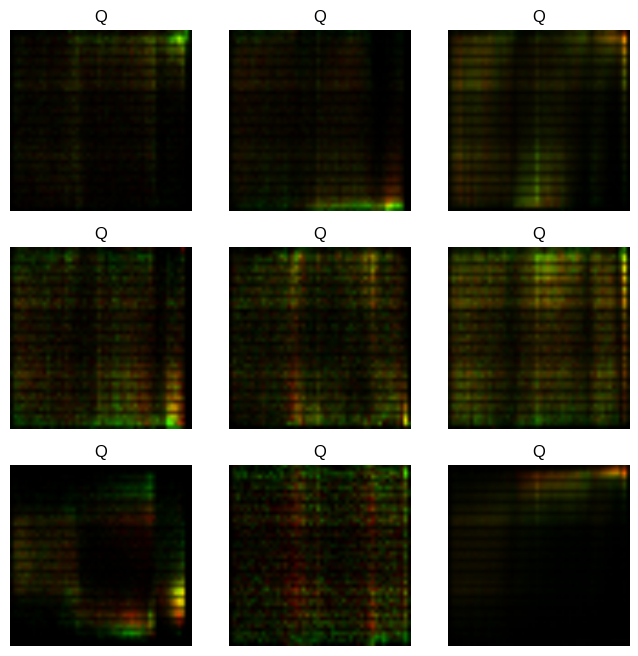

In [8]:
dls = dblock.dataloaders(dmdt_by_Name_Band, bs=32)  # Batch size of 32
dls.show_batch(max_n=9, figsize=(8, 8))

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Suggested Learning Rates: Min: 0.005248074419796467


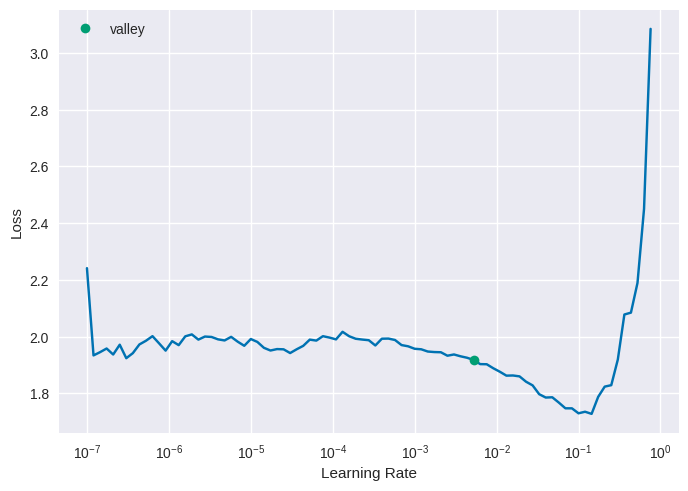

In [9]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])

lr_min = learn.lr_find(show_plot=True)
print(f"Suggested Learning Rates: Min: {lr_min.valley}")

In [15]:
learn.fine_tune(10, base_lr=lr_min.valley, cbs=[SaveModelCallback(monitor='valid_loss', comp=np.less, fname='equivalent_bins_noRCPA_model'), EarlyStoppingCallback(monitor='valid_loss', patience=3)])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.632865,0.624495,0.811357,0.188643,01:29


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7892075744a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    Exception ignored in: self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x7892075744a0>

  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
        self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():if w.is_alive():

           ^^   ^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
^ ^  ^  ^ ^  
   ^  File "/us

Better model found at epoch 0 with valid_loss value: 0.6244950294494629.


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.519224,0.539541,0.838460,0.161540,01:54
1,0.563012,0.713169,0.838245,0.161755,01:53
2,0.567799,0.528816,0.841471,0.158529,01:53
3,0.539679,0.597470,0.838675,0.161325,01:52
4,0.532487,0.540972,0.842977,0.157023,01:50
5,0.545866,0.535920,0.840396,0.159604,01:51


Better model found at epoch 0 with valid_loss value: 0.539540708065033.
Better model found at epoch 2 with valid_loss value: 0.5288156867027283.
No improvement since epoch 2: early stopping


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

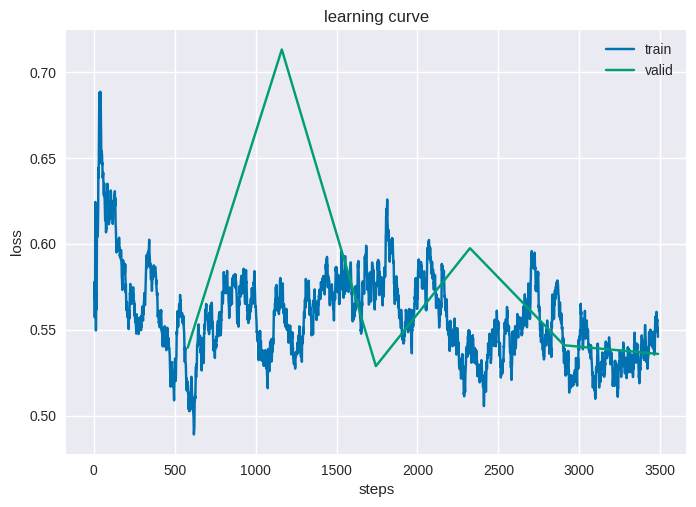

In [16]:
learn.recorder.plot_loss()

In [17]:
preds, targets = learn.get_preds()
pred_classes = preds.argmax(dim=1)

# Generate the report
report = classification_report(targets, pred_classes, target_names=dls.vocab)
print(report)

              precision    recall  f1-score   support

           Q       0.84      1.00      0.91      3899
          QR       0.00      0.00      0.00       258
          QX       0.59      0.05      0.09       492

    accuracy                           0.84      4649
   macro avg       0.48      0.35      0.33      4649
weighted avg       0.77      0.84      0.78      4649



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# learn.show_results(max_n=9, figsize=(10, 10))  # Show 9 results

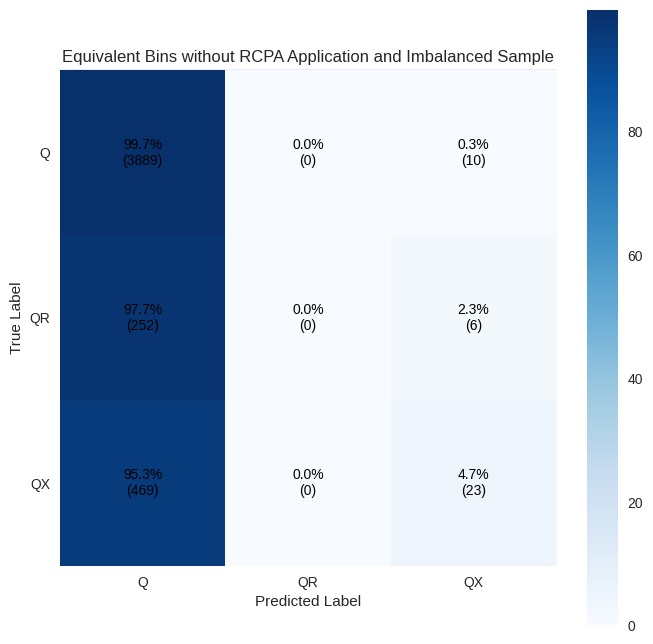

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
cm = interp.confusion_matrix()
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm_percent, cmap='Blues', interpolation='nearest')

# Add text annotations
for i in range(len(cm_percent)):
    for j in range(len(cm_percent[i])):
        text = f"{cm_percent[i, j]:.1f}%\n({int(cm[i, j])})"
        ax.text(j, i, text, ha="center", va="center", color="black")

ax.set_title("Equivalent Bins without RCPA Application and Imbalanced Sample")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xticks(range(len(interp.vocab)))
ax.set_yticks(range(len(interp.vocab)))
ax.set_xticklabels(interp.vocab)
ax.set_yticklabels(interp.vocab)
plt.colorbar(im)
plt.grid(False)
plt.show()

In [20]:
# interp.plot_top_losses(k=6, figsize=(10, 10))  # Show 5 samples with largest loss

## Now with a sample of equal numbers of objects

In [21]:
n_samples = dmdt_by_Name_Band['type'].value_counts().values[-1]
sampled_df = dmdt_by_Name_Band.groupby('type', group_keys=False).apply(lambda x: x.sample(n=min(len(x), n_samples)))
sampled_df

<ipython-input-21-46cb232b9ce2>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = dmdt_by_Name_Band.groupby('type', group_keys=False).apply(lambda x: x.sample(n=min(len(x), n_samples)))


,type,histogram
15250,Q,"[[[0.0, 3.694317400973822e-06, 0.0], [0.0, 2.9554539207790575e-05, 0.0], [0.0, 3.694317400973822e-06, 0.0], [0.0, 3.694317400973822e-06, 0.0], [0.0, 0.0, 0.0], [0.0, 1.1082952202921466e-05, 0.0], [0.0, 1.1082952202921466e-05, 0.0], [0.0, 2.2165904405842933e-05, 0.0], [0.0, 0.0, 0.0], [0.0, 7.388634801947644e-06, 0.0], [3.4742971496866185e-06, 4.8026126212659685e-05, 0.0], [0.0, 2.5860221806816756e-05, 0.0], [0.0, 1.4777269603895287e-05, 0.0], [6.948594299373237e-06, 4.8026126212659685e-05, 0.0], [1.737148574843309e-05, 7.019203061850261e-05, 0.0], [1.3897188598746474e-05, 0.000118218156831..."
11510,Q,"[[[1.986557626725822e-05, 0.0002421094334639257, 0.0], [5.297487004602192e-05, 0.0020689351586917286, 0.0], [0.0, 0.0009904476823524232, 0.0], [1.324371751150548e-05, 0.00014306466522868337, 0.0], [1.986557626725822e-05, 0.00019808953647048466, 0.0], [1.324371751150548e-05, 0.0001320596909803231, 0.0], [1.324371751150548e-05, 0.0009684377338557028, 0.0], [0.0, 0.00015406963947704362, 0.0], [1.324371751150548e-05, 0.00011004974248360258, 0.0], [1.324371751150548e-05, 0.00012105471673196285, 0.0], [3.31092937787637e-05, 0.0001870845622221244, 0.0], [6.62185875575274e-06, 0.000132059690980323..."
3926,Q,"[[[0.0005756389592447617, 6.904170118751726e-05, 0.0], [0.0006216900759843427, 0.00027616680475006904, 0.0], [0.0002072300253281142, 0.00041425020712510354, 0.0], [0.00011512779184895233, 0.00027616680475006904, 0.0], [4.605111673958094e-05, 0.00013808340237503452, 0.0], [2.302555836979047e-05, 6.904170118751726e-05, 0.0], [6.90766751093714e-05, 0.00020712510356255177, 0.0], [0.00016117890858853326, 0.0004832919083126208, 0.0], [4.605111673958094e-05, 0.00013808340237503452, 0.0], [0.00011512779184895233, 0.00013808340237503452, 0.0], [0.00011512779184895233, 0.00027616680475006904, 0.0], ..."
9211,Q,"[[[3.5447417301175437e-06, 3.1724881824815203e-06, 0.0], [7.089483460235087e-06, 2.2207417277370642e-05, 0.0], [7.089483460235087e-06, 1.5862440912407603e-05, 0.0], [3.899215903129298e-05, 3.1724881824815203e-06, 0.0], [3.5447417301175435e-05, 1.5862440912407603e-05, 0.0], [3.190267557105789e-05, 9.517464547444561e-06, 0.0], [2.4813192110822806e-05, 3.1724881824815203e-06, 0.0], [3.5447417301175437e-06, 9.517464547444561e-06, 0.0], [2.4813192110822806e-05, 3.1724881824815203e-06, 0.0], [1.4178966920470175e-05, 6.3449763649630405e-06, 0.0], [7.089483460235087e-06, 6.3449763649630405e-06, 0...."
4062,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
...,...,...
22130,QX,"[[[1.4906739709691245e-05, 4.8021723281368005e-05, 0.0], [0.00010807386289526152, 0.00018335567071067784, 0.0], [0.00012670728753237559, 0.00017462444829588366, 0.0], [7.080701362103341e-05, 6.111855690355929e-05, 0.0], [8.198706840330185e-05, 0.00011350589139232438, 0.0], [6.70803286936106e-05, 9.167783535533892e-05, 0.0], [9.689380811299309e-05, 6.984977931835346e-05, 0.0], [0.00011925391767752996, 8.731222414794183e-05, 0.0], [0.00018260756144371774, 0.00018772128191807494, 0.0], [0.00022732778057279148, 0.00018772128191807494, 0.0], [0.0003614884379600127, 0.00023574300519944294, 0.0],..."
21055,QX,"[[[1.5445160413436053e-05, 1.1933352227807694e-05, 0.0], [9.267096248061632e-06, 5.07167469681827e-05, 0.0], [5.251354540568258e-05, 2.9833380569519234e-06, 0.0], [5.5602577488369794e-05, 0.0, 0.0], [6.486967373643142e-05, 0.0, 0.0], [5.5602577488369794e-05, 0.0, 0.0], [6.178064165374421e-05, 0.0, 0.0],

In [22]:
sampled_df['type'].value_counts()

,count
type,
Q,1277
QR,1277
QX,1277


Now trying it with undersampling.

In [23]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # Input: images, Output: categories
    get_x=lambda r: numpy_to_pil(r['histogram']),  # Convert NumPy array to image
    get_y=lambda r: r['type'],           # Get the label (type)
    splitter=RandomSplitter(valid_pct=0.2),  # Split into training and validation sets
    item_tfms=Resize(224)
)

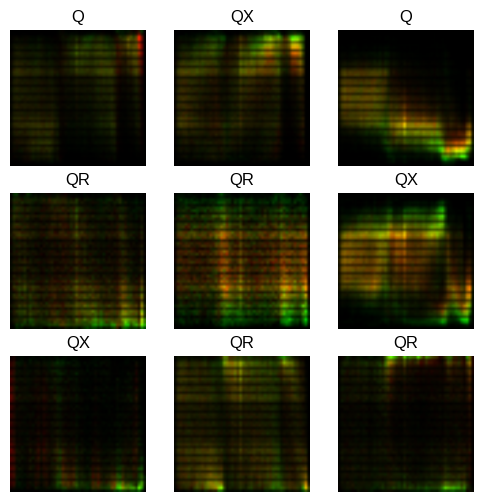

In [24]:
dls = dblock.dataloaders(sampled_df, bs=32)  # Batch size of 32
dls.show_batch(max_n=9, figsize=(6, 6))

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Suggested Learning Rates: Min: 0.0008317637839354575


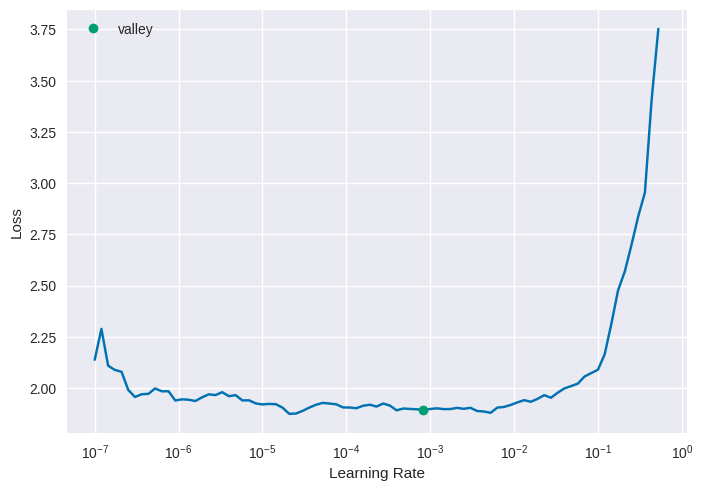

In [25]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])

lr_min = learn.lr_find(show_plot=True)
print(f"Suggested Learning Rates: Min: {lr_min.valley}")

In [26]:
learn.fine_tune(10, base_lr=lr_min.valley, cbs=[SaveModelCallback(monitor='valid_loss', comp=np.less, fname='equivalent_bins_noRCPA_model'), EarlyStoppingCallback(monitor='valid_loss', patience=3)])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.748793,1.345775,0.425587,0.574413,00:16


Better model found at epoch 0 with valid_loss value: 1.3457753658294678.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.449068,1.271546,0.408616,0.591384,00:19
1,1.319798,1.255434,0.413838,0.586162,00:18
2,1.217851,1.304869,0.425587,0.574413,00:18
3,1.023453,1.396664,0.425587,0.574413,00:19
4,0.778448,1.485697,0.409922,0.590078,00:20


Better model found at epoch 0 with valid_loss value: 1.2715455293655396.
Better model found at epoch 1 with valid_loss value: 1.2554336786270142.
No improvement since epoch 1: early stopping


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

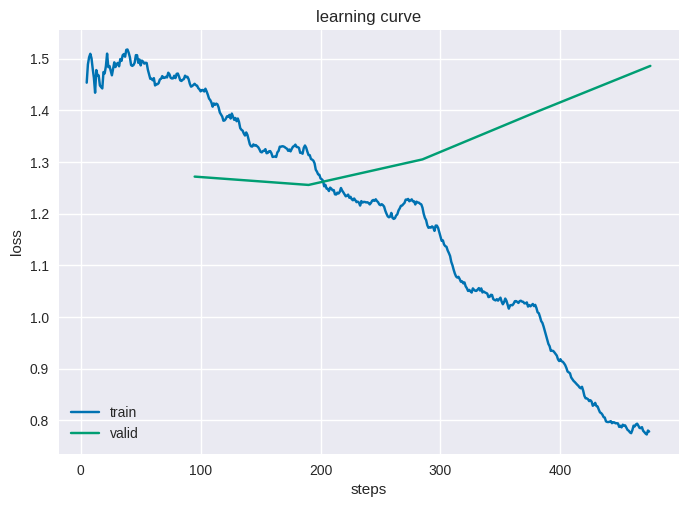

In [27]:
learn.recorder.plot_loss()

In [28]:
preds, targets = learn.get_preds()
pred_classes = preds.argmax(dim=1)

# Generate the report
report = classification_report(targets, pred_classes, target_names=dls.vocab)
print(report)

              precision    recall  f1-score   support

           Q       0.42      0.40      0.41       273
          QR       0.36      0.41      0.38       244
          QX       0.47      0.43      0.45       249

    accuracy                           0.41       766
   macro avg       0.42      0.41      0.41       766
weighted avg       0.42      0.41      0.41       766



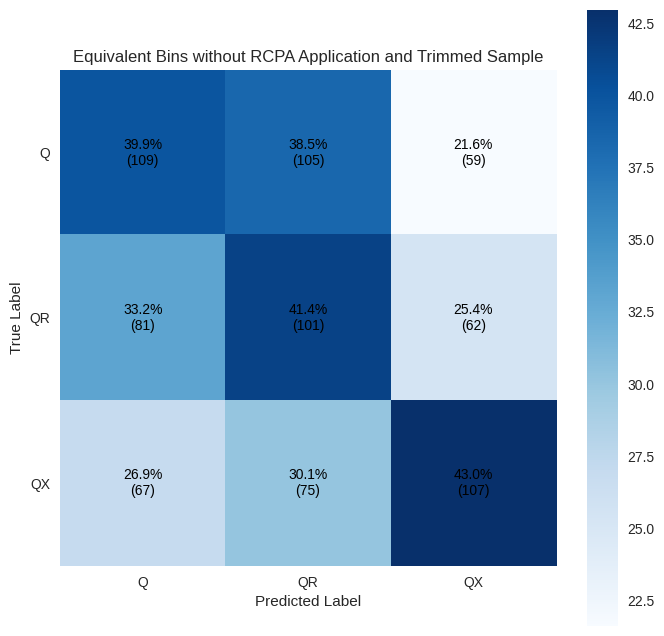

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
cm = interp.confusion_matrix()
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm_percent, cmap='Blues', interpolation='nearest')

# Add text annotations
for i in range(len(cm_percent)):
    for j in range(len(cm_percent[i])):
        text = f"{cm_percent[i, j]:.1f}%\n({int(cm[i, j])})"
        ax.text(j, i, text, ha="center", va="center", color="black")

ax.set_title("Equivalent Bins without RCPA Application and Trimmed Sample")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xticks(range(len(interp.vocab)))
ax.set_yticks(range(len(interp.vocab)))
ax.set_xticklabels(interp.vocab)
ax.set_yticklabels(interp.vocab)
plt.colorbar(im)
plt.grid(False)
plt.show()

# Classification with linear bined images

In [ ]:
dmdt_by_Name_Band_file = Thesis_Files + 'Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50_linear_bins.pkl'

In [ ]:
dmdt_by_Name_Band = pd.read_pickle(dmdt_by_Name_Band_file)
dmdt_by_Name_Band

,name,type,band,n_good_det,hist_p_scale,histogram
0,1E 22044+468,A,rg,"[697, 439]","[242556, 96141]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
1,2E 1853.7+4452,A,rg,"[591, 158]","[174345, 12403]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
2,2MASS J00265121-0159238,A,rg,"[257, 219]","[32896, 23871]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
3,2MASS J00573811-1406173,A,rg,"[162, 147]","[13041, 10731]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
4,2MASS J01283395-2358359,A,rg,"[81, 103]","[3240, 5253]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
...,...,...,...,...,...,...
31798,J224028.85-010649.8,Seyfert_1,rg,"[149, 125]","[11026, 7750]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.

In [ ]:
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['type'].isin(['Q', 'QR', 'QX'])].reset_index(drop=True)
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['band'] == 'rg']
dmdt_by_Name_Band = dmdt_by_Name_Band.drop(columns=['name', 'band', 'n_good_det', 'hist_p_scale'])

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # Input: images, Output: categories
    get_x=lambda r: numpy_to_pil(r['histogram']),  # Convert NumPy array to image
    get_y=lambda r: r['type'],           # Get the label (type)
    splitter=RandomSplitter(valid_pct=0.2),  # Split into training and validation sets
    item_tfms=Resize(224)
)

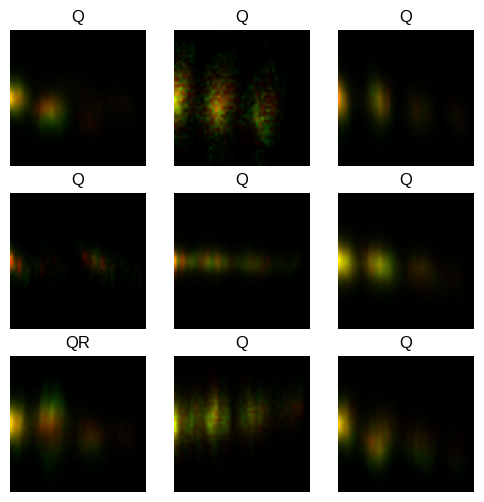

In [ ]:
dls = dblock.dataloaders(dmdt_by_Name_Band, bs=32)  # Batch size of 32
dls.show_batch(max_n=9, figsize=(6, 6))

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Suggested Learning Rates: Min: 0.00363078061491251


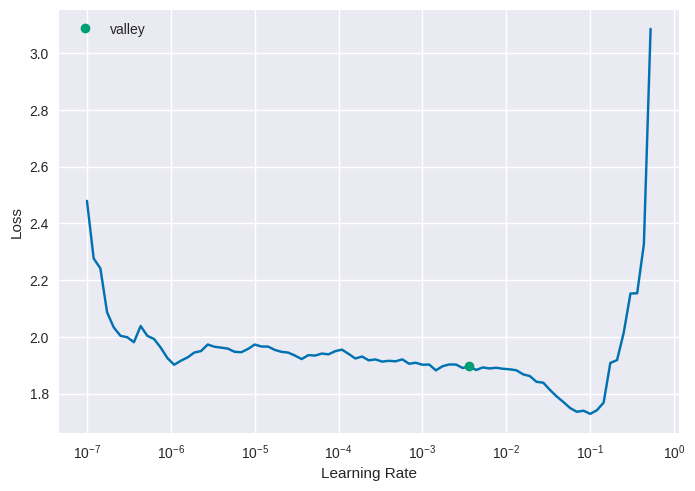

In [ ]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])

lr_min = learn.lr_find(show_plot=True)
print(f"Suggested Learning Rates: Min: {lr_min.valley}")

In [ ]:
learn.fine_tune(5, base_lr=lr_min.valley)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.639647,0.606308,0.828995,0.171005,01:29


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.568421,0.579845,0.838460,0.161540,01:51
1,0.549408,0.537766,0.839535,0.160465,01:51
2,0.531694,0.515730,0.839105,0.160895,01:51
3,0.504551,0.526906,0.837384,0.162616,01:50
4,0.501184,0.521156,0.839535,0.160465,01:53


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

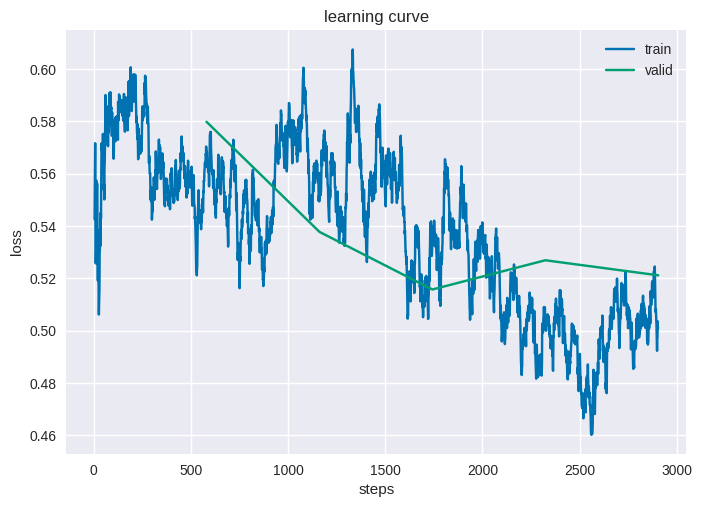

In [ ]:
learn.recorder.plot_loss()

In [ ]:
preds, targets = learn.get_preds()
pred_classes = preds.argmax(dim=1)

# Generate the report
report = classification_report(targets, pred_classes, target_names=dls.vocab)
print(report)

              precision    recall  f1-score   support

           Q       0.85      0.99      0.91      3888
          QR       0.00      0.00      0.00       239
          QX       0.54      0.10      0.17       522

    accuracy                           0.84      4649
   macro avg       0.46      0.36      0.36      4649
weighted avg       0.77      0.84      0.78      4649



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


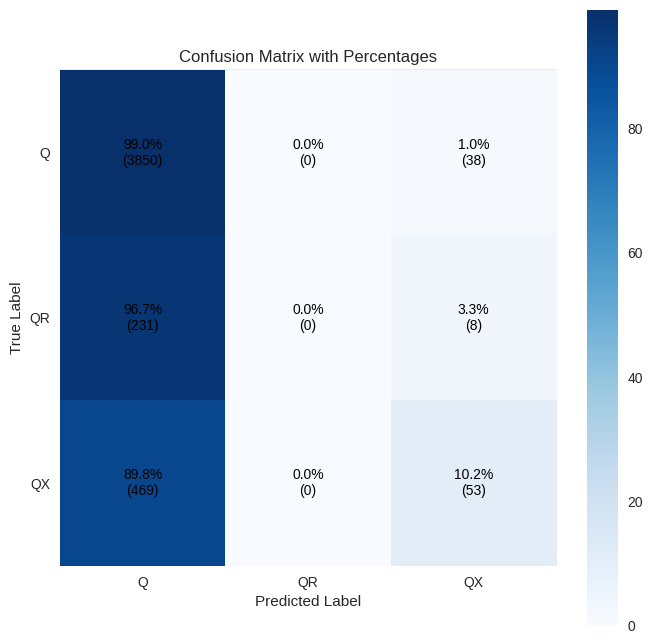

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
cm = interp.confusion_matrix()
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm_percent, cmap='Blues', interpolation='nearest')

# Add text annotations
for i in range(len(cm_percent)):
    for j in range(len(cm_percent[i])):
        text = f"{cm_percent[i, j]:.1f}%\n({int(cm[i, j])})"
        ax.text(j, i, text, ha="center", va="center", color="black")

ax.set_title("Confusion Matrix with Percentages")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xticks(range(len(interp.vocab)))
ax.set_yticks(range(len(interp.vocab)))
ax.set_xticklabels(interp.vocab)
ax.set_yticklabels(interp.vocab)
plt.colorbar(im)
plt.grid(False)
plt.show()

## Now with a sample of equal numbers of objects

In [ ]:
n_samples = dmdt_by_Name_Band['type'].value_counts().values[-1]
sampled_df = dmdt_by_Name_Band.groupby('type', group_keys=False).apply(lambda x: x.sample(n=min(len(x), n_samples)))
sampled_df

<ipython-input-60-46cb232b9ce2>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = dmdt_by_Name_Band.groupby('type', group_keys=False).apply(lambda x: x.sample(n=min(len(x), n_samples)))


,type,histogram
13322,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 2.6963989591900018e-05, 0.0], [0.0, 1.3481994795950009e-05, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 1.3481994795950009e-05, 0.0], [0.0, 4.0445984387850025e-05, 0.0], [0.0, 1.3481994795950009e-05, 0.0], [0.0, 1.3481994795950009e-05, 0.0], [1.0362157401170924e-05, 0.0, 0.0], [0.0, 1.3481994795950009e-05, 0.0], [0.0, 0.0, 0.0], [1.0362157401170924e-05, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]..."
15146,Q,"[[[3.579546471462066e-05, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.789773235731033e-05, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.789773235731033e-05, 0.0, 0.0], [5.369319707193099e-05, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [5.369319707193099e-05, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.789773235731033e-05, 0.0, 0.0], [3.579546471462066e-05, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [3.579546471462066e-05, 0.0, 0.0], [1.78977..."
10161,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
18836,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
1217,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 9.391729017312087e-05, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 3.130576339104029e-05, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 3.130576339104029e-05, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0...."
...,...,...
22693,QX,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
23233,QX,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # Input: images, Output: categories
    get_x=lambda r: numpy_to_pil(r['histogram']),  # Convert NumPy array to image
    get_y=lambda r: r['type'],           # Get the label (type)
    splitter=RandomSplitter(valid_pct=0.2),  # Split into training and validation sets
    item_tfms=Resize(224)
)

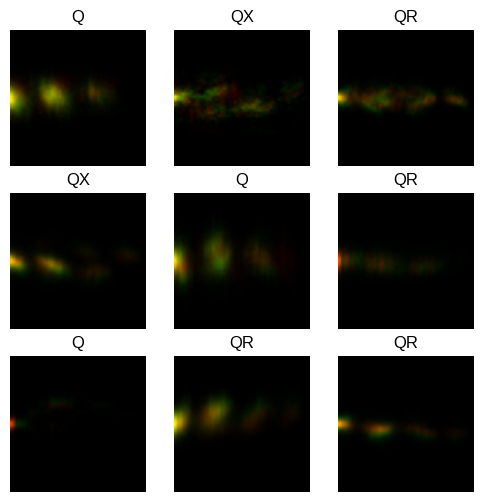

In [ ]:
dls = dblock.dataloaders(sampled_df, bs=32)  # Batch size of 32
dls.show_batch(max_n=9, figsize=(6, 6))

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Suggested Learning Rates: Min: 0.0008317637839354575


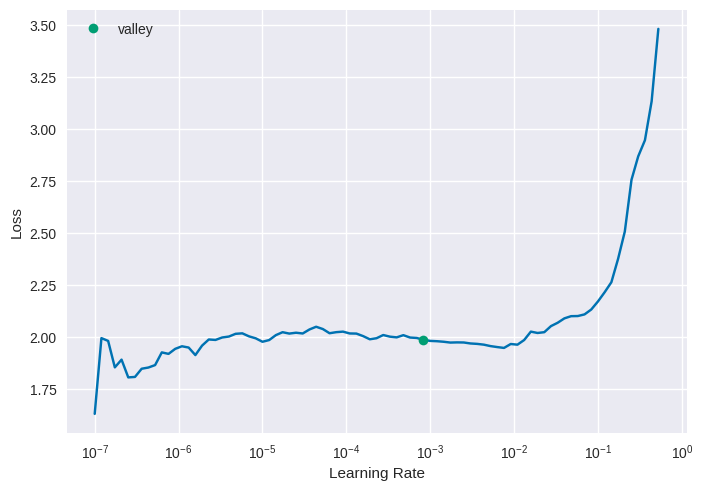

In [ ]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])

lr_min = learn.lr_find(show_plot=True)
print(f"Suggested Learning Rates: Min: {lr_min.valley}")

In [ ]:
learn.fine_tune(5, base_lr=lr_min.valley)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.863836,1.460804,0.370757,0.629243,00:16


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.597202,1.310873,0.390339,0.609661,00:19
1,1.522596,1.241218,0.425587,0.574413,00:20
2,1.344798,1.240126,0.441253,0.558747,00:19
3,1.092628,1.217746,0.430809,0.569191,00:18
4,0.867877,1.217213,0.438642,0.561358,00:18


In [ ]:
learn.fine_tune(5, base_lr=lr_min.valley)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.847350,1.383948,0.407311,0.592689,00:15


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.839091,1.531222,0.429504,0.570496,00:18
1,0.875869,1.589611,0.445170,0.554830,00:18
2,0.633536,1.612174,0.419060,0.580940,00:18
3,0.376455,1.697841,0.439948,0.560052,00:19
4,0.211652,1.711410,0.442559,0.557441,00:21


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

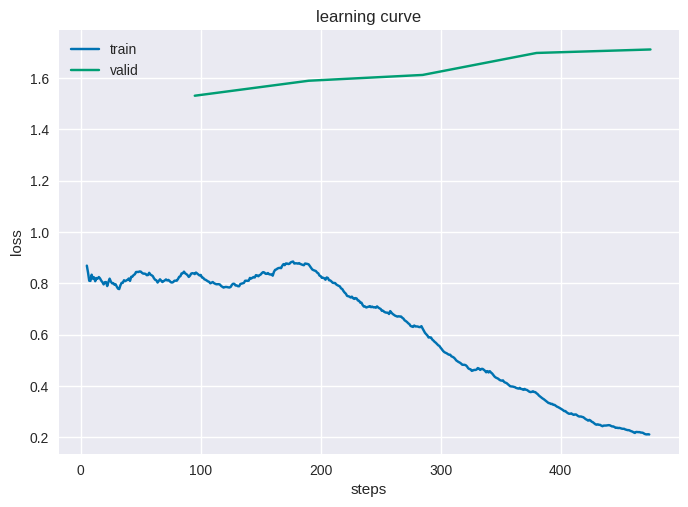

In [ ]:
learn.recorder.plot_loss()

In [ ]:
preds, targets = learn.get_preds()
pred_classes = preds.argmax(dim=1)

# Generate the reporta
report = classification_report(targets, pred_classes, target_names=dls.vocab)
print(report)

              precision    recall  f1-score   support

           Q       0.43      0.44      0.43       261
          QR       0.45      0.41      0.43       262
          QX       0.45      0.48      0.46       243

    accuracy                           0.44       766
   macro avg       0.44      0.44      0.44       766
weighted avg       0.44      0.44      0.44       766



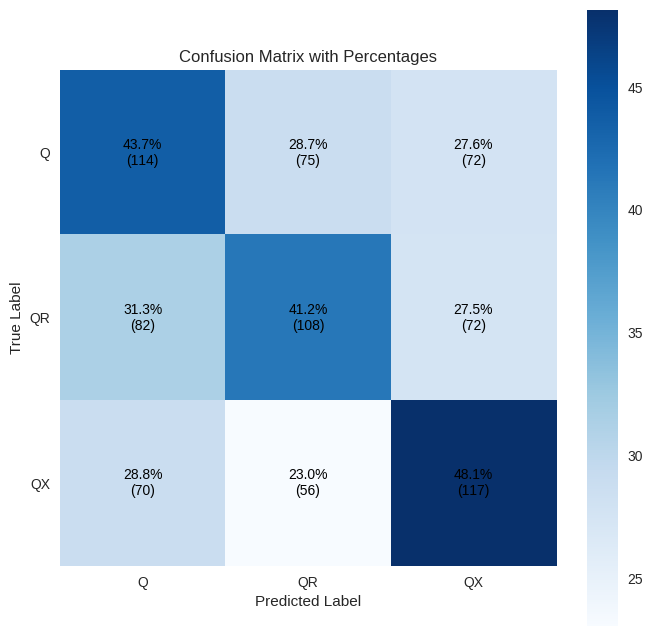

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
cm = interp.confusion_matrix()
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm_percent, cmap='Blues', interpolation='nearest')

# Add text annotations
for i in range(len(cm_percent)):
    for j in range(len(cm_percent[i])):
        text = f"{cm_percent[i, j]:.1f}%\n({int(cm[i, j])})"
        ax.text(j, i, text, ha="center", va="center", color="black")

ax.set_title("Confusion Matrix with Percentages")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xticks(range(len(interp.vocab)))
ax.set_yticks(range(len(interp.vocab)))
ax.set_xticklabels(interp.vocab)
ax.set_yticklabels(interp.vocab)
plt.colorbar(im)
plt.grid(False)
plt.show()